In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.optimize as opt


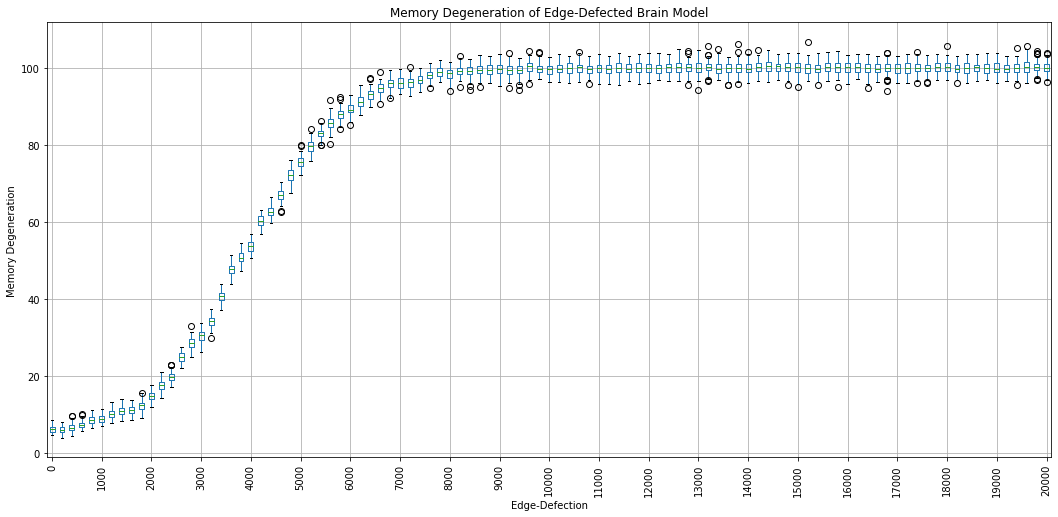

In [3]:
dfSource = pd.read_csv('./damaged_edge/damaged_edge.csv')
dfSource.drop(columns =['Unnamed: 0'], inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
dfSource.boxplot(ax = ax, rot=90)

plt.title("Memory Degeneration of Edge-Defected Brain Model")
plt.xlabel('Edge-Defection')
plt.xticks(range(1, 105, 5))
plt.ylabel('Memory Degeneration')
plt.savefig('damaged_edge/graph1')

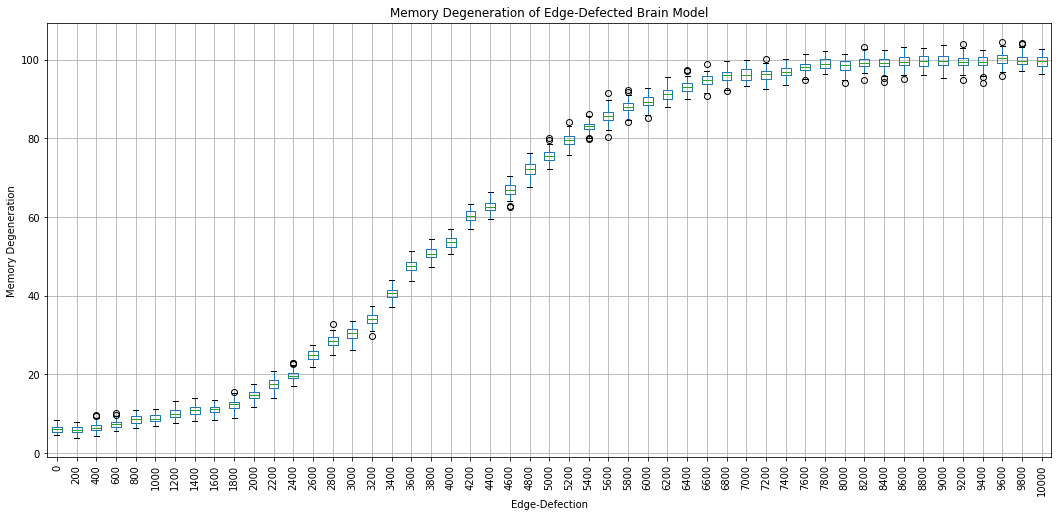

In [4]:
cols = [str(i) for i in range(10200, 20200, 200)]
df = dfSource.drop(columns = cols)
fig. ax = plt.subplots(figsize=(18,8))
df.boxplot(rot = 90)
plt.title("Memory Degeneration of Edge-Defected Brain Model")
plt.xlabel('Edge-Defection')
plt.ylabel('Memory Degeneration')
plt.savefig('damaged_edge/graph2')

In [5]:
dfMean = df.mean()
x = np.array([float(s) for s in dfMean.index])
y = dfMean.values
def logifunc(x,A,c, k, off):
    return A / (1 + c* np.exp(-k*x)) + off

popt, pcov = opt.curve_fit(logifunc, x, y, p0=[100, 4, 0.001, 50])
print(*popt)


96.385115210033 52.87192578913527 0.0010165021548641552 3.7295394890604783
[[ 3.03626894e-01 -1.55480074e+00 -6.61296142e-06 -2.12450422e-01]
 [-1.55480074e+00  1.15952584e+01  4.89786786e-05  1.16665565e+00]
 [-6.61296142e-06  4.89786786e-05  2.18849429e-10  4.52167039e-06]
 [-2.12450422e-01  1.16665565e+00  4.52167039e-06  1.79752414e-01]]


In [20]:
err = (y-np.array(list(map(lambda x: logifunc(x, *popt), x))))
pow(pow(err, 2).mean(), 0.5)

0.8020087834815899

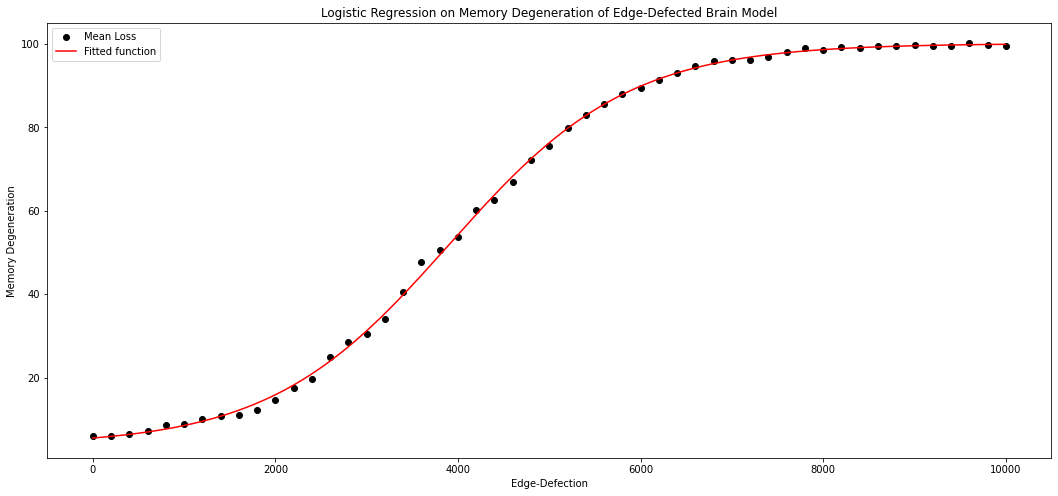

In [17]:
x_data = np.linspace(0, 10000 ,num=2400)

fig. ax = plt.subplots(figsize=(18, 8))

plt.scatter(x,y,label='Mean Loss', c="black")
plt.plot(x_data, logifunc(x_data, *popt), 'r-',label='Fitted function')

plt.title("Logistic Regression on Memory Degeneration of Edge-Defected Brain Model")
plt.xlabel('Edge-Defection')
plt.ylabel('Memory Degeneration')
#plt.xlim(170,210)
#plt.ylim(-210,-160)
plt.legend()
plt.savefig('damaged_edge/graph3')